# Estadística descriptiva

Archivo a descargar:
*   [adult](https://archive.ics.uci.edu/ml/datasets/Adult)



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm, kde
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("seaborn")

## Introducción

**La estadística descriptiva ayuda a describir y resumir cuantitativamente grandes cantidades de datos.** En la estadística descriptiva, no inferimos, es decir, no sacamos conclusiones más allá de los datos que estamos analizando. 

La estadística, y en particular la estadística descriptiva, se basa en dos conceptos principales:
* **Población**: Una colección de objetos ("unidades") sobre los cuales se busca información.
* **Muestra**: Una parte de la población que se observa.

**La estadística descriptiva aplica conceptos y medidas para describir y resumir las características básicas de las muestras en un estudio** y proporcionar información sobre las muestras como una aproximación de la población. Estos conceptos y medidas, junto con la visualización de datos, conforman la base del análisis cuantitativo de datos.


Existen dos principales etapas en el análisis cuantitativo de datos:
1. **Preprocesamiento de datos**: Dado un ejemplo específico, preparamos los datos para generar descripciones estadísticamente válidas.
2. **Análisis exploratorio**: Generamos diferentes estadísticas para describir y resumir los datos de manera concisa y evaluar diferentes formas de visualizarlos.

## Prepocesamiento de datos

Una de las primeras tareas al analizar datos es recolectar y preparar los datos en un formato apropiado para el análisis de las muestras. Los pasos más comunes para la preparación de datos involucran los siguientes:
 1. **Obtención de los datos**: Los datos se pueden leer directamente de un archivo, mediante web scrapping, levantando encuestas, etc.
 2. **Análisis sintático (parsing) de los datos**: El procedimiento de análisis sintáctico (parsing) correcto depende del formato en el que se encuentren los datos: texto plano, CSV, XML, HTML, etc.
 3. **Limpieza de los datos**: En muchas ocasiones, los datos no están completos, por lo que es necesario llevar a cabo las sustituciones o imputaciones correspondientes.
 4. **Construcción de estructuras de datos**: Es necesario almacenar los datos en una estructura de datos que se preste al análisis que nos interesa. Si los datos no caben en la memoria del equipo de cómputo en el que estamos trabajando, por lo general es necesario crear una base de datos. 

Consideremos un conjunto de datos de dominio público [adult](https://archive.ics.uci.edu/ml/datasets/Adult) alojado en el UCI Machine Learning Repository que contiene aproximadamente 32,000 observaciones extraídas de la base de datos del censo poblacional de Estados Unidos de 1994 para explorar las diferencias en ingreso entre hombres y mujeres.

In [ ]:
# Lee archivo
url = "https://raw.githubusercontent.com/sarahiaguilar/fundamentos-cdd/main/datos/adult.data"
df = pd.read_table(url, header=None, sep=",")

In [ ]:
# Cambia columnas
df.columns = ["age", "workclass", "fnlwgt",
              "education", "education_num", "marital_status",
              "occupation", "relationship", "race",
              "sex", "capital_gain", "capital_loss",
              "hours_per_week", "native_country", "income"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Imprime valores únicos en columna income


array([' <=50K', ' >50K'], dtype=object)

In [ ]:
# Función que remueve espacios en columnas de cadenas de caracteres
def leading_space_remover(dataframe):
    for i in dataframe.columns:         
        if dataframe[i].dtype == "object":
            dataframe[i] = dataframe[i].map(str.strip)

In [ ]:
# Remueve espacios en columnas de cadenas de caracteres
leading_space_remover(df)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Análisis exploratorio

**Describir y resumir la distribución de la muestra, es uno de los principales objetivos del análisis exploratorio.**

Los datos que provienen de realizar una medición particular en todos los objetos de una muestra representan nuestras observaciones para una sola variable, como edad, educación, ingreso, etc. Estas mediciones representan una distribución muestral de cada variable respectivamente, que a su vez representa aproximadamente la distribución poblacional de la variable. 

### Síntesis

<image src="https://c.tenor.com/DmN5B0SXQHMAAAAd/let-me-explain-sum-up.gif">

Las variables en general pueden ser categóricas o numéricas.

Para las **variables categóricas**, una simple tabla de frecuencias de cada categoría es la mejor exploración no gráfica para el análisis de datos.

¿Cuál es la distribución de adultos por país de origen?

In [ ]:
# Devuelve distribución de adultos por país de origen 


native_country
?                              1.790486
Cambodia                       0.058352
Canada                         0.371610
China                          0.230337
Columbia                       0.181198
Cuba                           0.291760
Dominican-Republic             0.214981
Ecuador                        0.085992
El-Salvador                    0.325543
England                        0.276404
France                         0.089064
Germany                        0.420749
Greece                         0.089064
Guatemala                      0.196554
Haiti                          0.135131
Holand-Netherlands             0.003071
Honduras                       0.039925
Hong                           0.061423
Hungary                        0.039925
India                          0.307116
Iran                           0.132060
Ireland                        0.073708
Italy                          0.224195
Jamaica                        0.248764
Japan                    

¿Qué porcentaje de los hombres tiene un ingreso mayor a los 50K y qué porcentaje de las mujeres tiene un ingreso mayor a los 50K?

In [ ]:
# Selecciona hombres
df_m = df[df.sex == "Male"]

# Selecciona hombres con un ingreso mayor a los 50K
df_m_50k = df_m[df_m.income == ">50K"]

# Guarda porcentaje de los hombres con un ingreso mayor a los 50K
pct_m_50k = round(len(df_m_50k)/len(df_m)*100)

print("{0}% de los hombres tiene un ingreso mayor a los 50K.".format(pct_m_50k))

31% de los hombres tiene un ingreso mayor a los 50K.


In [ ]:
# Selecciona mujeres
df_f = 

# Selecciona mujeres con un ingreso mayor a los 50K
df_f_50k = 

# Guarda porcentaje de las mujeres con un ingreso mayor a los 50K
pct_f_50k = 

print("{0}% de las mujeres tiene un ingreso mayor a los 50K.".format(pct_f_50k))

11% de las mujeres tiene un ingreso mayor a los 50K.


Dada una variable numérica, el análisis exploratorio es una forma de realizar evaluaciones preliminares sobre su distribución en la población utilizando los datos de las muestras observadas. Las características de la distribución de una variable numérica son su media, varianza, desviación estándar, mediana, cuantiles, etc. 

#### Media

Una de las primeras medidas que usamos para observar los datos es la media de la muestra.

**Dada una muestra de $n$ valores, ${x_i}$, $i=1$, ..., $n$, la media, $\mu$, es la suma de los valores dividida por el número de valores**, en otras palabras:


$\mu = \frac{1}{n} + \sum \limits _{i=1} ^{n} x_{i}$

Los términos media y promedio a menudo se usan indistintamente. De hecho, la principal distinción entre ellos es que la media de una muestra es el resumen estadístico, mientras que el promedio no está estrictamente definido y podría ser uno de los muchos estadísticos de resumen que se pueden elegir para describir la tendencia central de una muestra.

¿Cuál es la edad media de los hombres y la edad media de los hombres que tienen un ingreso mayor a los 50K?

In [ ]:
# Guarda edad media de los hombres
mu_age_m = round(df_m.age.mean())

# Guarda edad media de los hombres que tienen un ingreso mayor a los 50K
mu_age_m_50k = round(df_m_50k.age.mean())

print("La edad media de los hombres es de {0}, mientras que la de los hombres con un ingreso mayor a los 50K es de {1}.".format(mu_age_m, mu_age_m_50k))

La edad media de los hombres es de 39, mientras que la de los hombres con un ingreso mayor a los 50K es de 45.


¿Cuál es la edad media de las mujeres y la edad media de las mujeres que tienen un ingreso mayor a los 50K?

In [ ]:
# Guarda edad media de las mujeres
mu_age_f = 

# Guarda edad media de las mujeres que tienen un ingreso mayor a los 50K
mu_age_f_50k = 

print("La edad media de las mujeres es de {0}, mientras que la de las mujeres con un ingreso mayor a los 50K es de {1}.".format(mu_age_f, mu_age_f_50k))

La edad media de las mujeres es de 37, mientras que la de las mujeres con un ingreso mayor a los 50K es de 42.


#### Varianza y desviación estándar

La varianza y la desviación estándar suelen ser buenos descriptores complementarios a la media. 

**La varianza $\sigma^2$ describe la dispersión de los datos** y se define de la siguiente manera:

$\sigma^{2} = \frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^{2}$

El término (xi − µ) se denomina desviación de la media, por lo que la varianza es la desviación cuadrática media. **La raíz cuadrada de la varianza, $\sigma$, se llama desviación estándar.**

Consideramos la desviación estándar, porque la varianza es difícil de interpretar (por ejemplo, si las unidades son gramos, la varianza está en gramos al cuadrado).

¿Cuál es la media, varianza y desviación estándar de horas trabajadas por semana de los hombres?

In [ ]:
# Guarda la media de horas trabahadas por los hombres 
mu_hpw_m = round(df_m.hours_per_week.mean())

print("La media de horas trabajadas por los hombres es {0}.".format(mu_hpw_m))

La media de horas trabajadas por los hombres es 42.


In [ ]:
# Guarda la varianza de horas trabahadas por los hombres 
var_hpw_m = round(df_m.hours_per_week.var())

print("La varianza de horas trabajadas por los hombres es {0}.".format(var_hpw_m))

La varianza de horas trabajadas por los hombres es 147.


In [ ]:
# Guarda la desviación estándar de horas trabajadas por los hombres 
std_hpw_m = round(df_m.hours_per_week.std())

print("La desviación estándar de horas trabajadas por los hombres es {0}.".format(std_hpw_m))

La desviación estándar de horas trabajadas por los hombres es 12.


¿Cuál es la media, varianza y desviación estándar de horas trabajadas por semana de las mujeres?

In [ ]:
# Guarda la media de horas trabahadas por las mujeres 
mu_hpw_f = 

print("La media de horas trabajadas por las mujeres es {0}.".format(mu_hpw_f))

La media de horas trabajadas por las mujeres es 36.


In [ ]:
# Guarda la varianza de horas trabajadas por las mujeres 
var_hpw_f = 

print("La varianza de horas trabajadas por las mujeres es {0}.".format(var_hpw_f))

La varianza de horas trabajadas por las mujeres es 140.


In [ ]:
# Guarda la desviación estándar de horas trabajadas por las mujeres 
std_hpw_f = 

print("La desviación estándar de horas trabajadas por las mujeres es {0}.".format(std_hpw_f))

La desviación estándar de horas trabajadas por las mujeres es 12.


#### Mediana

La media de las muestras es en general un buen descriptor, pero tiene un inconveniente importante: ¿qué sucedería si en el conjunto muestral hay un error con un valor muy diferente al resto? Por ejemplo, considerando las horas trabajadas por semana, normalmente estaría en un rango entre 20 y 50, ¿qué pasaria si por error hubiera un valor de 1,000? **Un elemento de datos que es significativamente diferente del resto de los datos se denomina valor atípico.** En este caso, la media, $\mu$, cambiará drásticamente hacia el valor atípico.

Una solución a este inconveniente la ofrece la mediana, $\mu_{1/2}$, una estadística de orden que da el valor medio de una muestra. En este caso, todos los valores están ordenados por su magnitud y la mediana se define como el valor que está en el medio de la lista ordenada. Por lo tanto, es un valor que es mucho más robusto frente a valores atípicos.

¿Cuál es la edad media y la edad mediana?

In [ ]:
# Guarda edad media
mu_age = 

# Guarda edad mediana
med_age = 

print("La edad media es de {0}.".format(mu_age))
print("La edad mediana es de {0}.".format(med_age))

La edad media es de 39.
La edad mediana es de 37.


¿Cuál es la edad media y la edad mediana de los adultos que tienen un ingreso mayor a los 50K?

In [ ]:
# Selecciona adultos con un ingreso mayor a los 50K
df_50k = 

# Guarda edad media de adultos con un ingreso mayor a los 50K
mu_age_50k = 

# Guarda edad mediana de adultos con un ingreso mayor a los 50K
med_age_50k = 

print("La edad media de los adultos con un ingreso mayor a los 50K es de {0}.".format(mu_age_50k))
print("La edad mediana de los adultos con un ingreso mayor a los 50K es de {0}.".format(med_age_50k))

La edad media de los adultos con un ingreso mayor a los 50K es de 44.
La edad mediana de los adultos con un ingreso mayor a los 50K es de 44.


#### Cuantiles

A veces nos interesa observar cómo se distribuyen los datos de la muestra en general. En este caso, podemos ordenar las muestras $x_i$ y luego encontrar la  $x_p$ para que divida los datos en dos partes, donde:

* una fracción p de los valores de los datos es menor o igual que $x_p$
* la fracción restante $(1 − p)$ es mayor que $x_p$.

El valor $x_p$ es el cuantil p-ésimo, o el percentil 100 × p-ésimo. Por ejemplo, un resumen de 5 números se define por los valores xmin, Q1, Q2, Q3, xmax, donde Q1 es el 25 × p-ésimo percentil, Q2 es el 50 × p-ésimo percentil y Q3 es el 75 × p-ésimo percentil.

¿Cuál es el intervalo donde alberga el 25% de las edades de los hombres más jóvenes?

In [ ]:
print("El 25% de los hombres más jóvenes tiene entre {0} y {1} años.".format(df_m.age.min(), round(df_m.age.quantile(0.25))))

El 25% de los hombres más jóvenes tiene entre 17 y 29 años.


¿Cuál es el intervalo donde alberga el 25% de las edades de las mujeres más jóvenes?

In [ ]:
print("El 25% de las mujeres más jóvenes tiene entre {0} y {1} años.".format(df_f.age.min(), ))

El 25% de las mujeres más jóvenes tiene entre 17 y 25 años.


### Distribución (empírica)

<image src="https://c.tenor.com/hMDp9eBsM4oAAAAC/honey-curves-dont-lie.gif">

Sumarizar datos simplemente observando medias, varianzas, desviaciones estándar y medianas puede ser peligroso: las mismas estadísticas pueden describir datos muy diferentes. Por lo tanto, resulta también necesario validar los datos inspeccionándolos. Una forma de hacerlo es observando la distribución de datos, que describe con qué frecuencia aparece cada valor.

**La representación más común de una distribución es un histograma**, que muestra gráficamente lo siguiente:

* Centro (es decir, la ubicación) de los datos
* Dispersión (es decir, la escala) de los datos
* Asimetría de los datos
* Presencia de valores atípicos
* Presencia de múltiples modas en los datos

¿Cómo se distribuyen las edades de los hombres y de las mujeres respectivamente en 20 particiones?

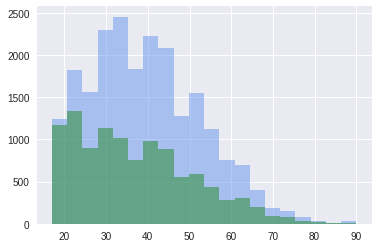

In [ ]:
# Grafica distribución de las edades de los hombres
df_m.age.hist(bins=20, alpha=0.5, color="cornflowerblue")

# Grafica distribución de las edades de las mujeres
.hist(bins=20, alpha=0.5, color="forestgreen")

En general, **es buena práctica normalizar las frecuencias de cada valor en un histograma**. Hay dos formas de hacerlo.

1. **Dividir la frecuencia de observaciones en una partición entre el total de observaciones**. En este caso, las frecuencias relativas suman 1. Por lo tanto, la altura de la barra del histograma representa la proporción de los datos en cada partición.

2. **Divir la frecuencia de observaciones en una partición entre el total de observaciones por el ancho de la partición**. En este caso, el área (o integral) bajo el histograma es igual a 1. Desde un punto de vista probabilístico, esta normalización da como resultado un histograma relativo que es más parecido a la **función de masa de probabilidad (abreviada PMF en inglés)**.

De forma normalizada, ¿cómo se distribuyen las edades de los hombres y de las mujeres respectivamente?

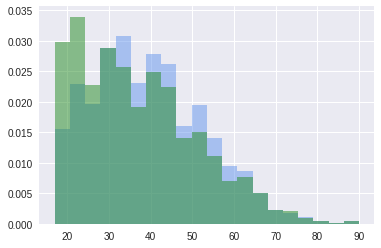

In [ ]:
# Grafica distribución de las edades de los hombres
df_m.age.hist(bins=20, alpha=0.5, color="cornflowerblue")

# Grafica distribución de las edades de las mujeres
.hist(bins=20, alpha=0.5, color="forestgreen")

Demuestra que la integral de la función de densidad de probabilidad de las edades de los hombres (variable aleatoria discreta) es igual a 1. 

In [ ]:
counts, bins = np.histogram(df_f.age, bins=20)
density = counts/(sum(counts)*np.diff(bins))
np.sum(density*np.diff(bins)) == 1

True

**La función de distribución acumulativa (abreviada CDF en inglés) describe la probabilidad de que una variable continua aleatoria $X$ con una distribución de probabilidad dada, tenga un valor menor o igual que $x$**.

De forma normalizada y acumulativa, ¿cómo se distribuyen las edades de los hombres y de las mujeres respectivamente?

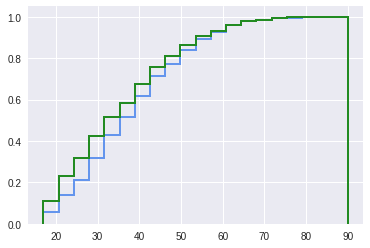

In [ ]:
# Grafica distribución de las edades de los hombres
df_m["age"].hist(bins=20, linewidth=2, color="cornflowerblue", density=True, cumulative=True, histtype="step")

# Grafica distribución de las edades de las mujeres
df_f["age"].hist(bins=20, linewidth=2, color="forestgreen", density=True, cumulative=True, histtype="step")

### Tratamiento de valores atípicos

<image src="https://i.gifer.com/6Xi3.gif">

**Los valores atípicos son muestras de datos con un valor que está lejos* de la tendencia central.**

*Se pueden definir diferentes reglas para detectar valores atípicos. Una de las reglas más comunes es definir los valores atípicos como aquellos que exceden la media en 2 o 3 desviaciones estándar.

¿Cuál es la edad mínima, máxima y media de los adultos que tienen un ingreso mayor a los 50K?

In [ ]:
# Guarda edad mínima de adultos con un ingreso mayor a los 50K
min_age_50k = 

# Guarda edad máxima de adultos con un ingreso mayor a los 50K
max_age_50k = 

print("La edad mínima de los adultos con un ingreso mayor a los 50K es de {0}.".format(min_age_50k))
print("La edad máxima de los adultos con un ingreso mayor a los 50K es de {0}.".format(max_age_50k))
print("La edad media de los adultos con un ingreso mayor a los 50K es de {0}.".format(mu_age_50k))

La edad mínima de los adultos con un ingreso mayor a los 50K es de 19.
La edad máxima de los adultos con un ingreso mayor a los 50K es de 90.
La edad media de los adultos con un ingreso mayor a los 50K es de 44.


¿Cuál es la desviación estándar de las edades de los adultos que tienen un ingreso mayor a los 50K?

In [ ]:
# Guarda desviación estándar de las edades de adultos con un ingreso mayor a los 50K
std_age_50k = 

print("La desviación estándar de las edades de los adultos con un ingreso mayor a los 50K es de {0}.".format(std_age_50k))

La desviación estándar de las edades de los adultos con un ingreso mayor a los 50K es de 11.


¿Cuál es la edad mínima, máxima y media de los adultos que tienen un ingreso mayor a los 50K sin valores atípicos en edad?

In [ ]:
# Selecciona adultos con un ingreso mayor a los 50K sin valores atípicos en edad
df_50k_c = df_50k[(df_50k.age >= (mu_age_50k-std_age_50k*2)) & (df_50k.age <= (mu_age_50k+std_age_50k*2))]

In [ ]:
# Guarda edad mínima de adultos con un ingreso mayor a los 50K
min_age_50k_c = round(df_50k_c.age.min())

# Guarda edad máxima de adultos con un ingreso mayor a los 50K
max_age_50k_c = round(df_50k_c.age.max())

# Guarda edad media de adultos con un ingreso mayor a los 50K
mu_age_50k_c = round(df_50k_c.age.mean())

print("La edad mínima de los adultos con un ingreso mayor a los 50K es de {0}.".format(min_age_50k_c))
print("La edad máxima de los adultos con un ingreso mayor a los 50K es de {0}.".format(max_age_50k_c))
print("La edad media de los adultos con un ingreso mayor a los 50K es de {0}.".format(mu_age_50k_c))

La edad mínima de los adultos con un ingreso mayor a los 50K es de 22.
La edad máxima de los adultos con un ingreso mayor a los 50K es de 66.
La edad media de los adultos con un ingreso mayor a los 50K es de 44.


### Asimetría

<image src="https://c.tenor.com/ekh_bPZ5ThIAAAAC/little-prince.gif">

Para datos univariados, la fórmula para la asimetría es una estadística que **mide el grado de asimetría del conjunto de n muestras de datos**, $x_i$:

$g_{1} = \frac{1}{n}\frac{\sum_{i=1}^{n}(x_{i}-\mu)^{3}}{\sigma}$

donde $\mu$ es la media, $\sigma$ es la desviación estándar y $n$ es el número de puntos de datos.

Para una distribución unimodal, el sesgo negativo comúnmente indica que la cola está en el lado izquierdo de la distribución, y el sesgo positivo indica que la cola está en el lado derecho. Un valor cero significa que las colas a ambos lados de la media se equilibran en general; este es el caso de una distribución simétrica, pero también puede ser cierto para una distribución asimétrica donde una cola es larga y delgada, y la otra es corta pero gruesa.

¿Cuál es el grado de asimetría de las edades de los hombres y mujeres respectivamente que tienen un ingreso mayor a los 50K sin valores atípicos en edad?

In [ ]:
# Función que calcula el grado de asimetría de una muestra
def skewness(X):
  X = np.array(X)

  mu = X.mean()
  std = X.std()

  g1 = 

  return g1

In [ ]:
# Devuelve grado de asimetría de las edades de los hombres que tienen un ingreso mayor a los 50K sin valores atípicos en edad
skewness(np.array(df_50k_c[df_50k_c.sex == "Male"].age))

0.14725263591559787

In [ ]:
# Devuelve grado de asimetría de las edades de las mujeres que tienen un ingreso mayor a los 50K sin valores atípicos en edad
skewness(np.array(df_50k_c[df_50k_c.sex == "Female"].age))

0.3040331248671587

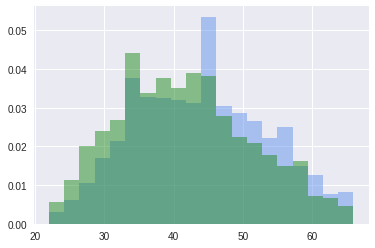

In [ ]:
# Grafica distribución de las edades de los hombres
df_50k_c[df_50k_c.sex == "Male"].age.hist(bins=20, alpha=0.5, color="cornflowerblue", density=True)

# Grafica distribución de las edades de las mujeres
df_50k_c[df_50k_c.sex == "Female"].age.hist(bins=20, alpha=0.5, color="forestgreen", density=True)

### Distribución continua

<image src="https://miro.medium.com/max/1100/0*gmjdcVExXhQqa9Dx.jpeg">

Las distribuciones que se han estudiando hasta ahora se basan en observaciones empíricas y, por lo tanto, se denominan distribuciones empíricas. Como alternativa, podemos considerar distribuciones que están definidas por una función continua. 

La **función de masa de probabilidad**, $f_x(x)$, de una variable aleatoria discreta $X$ se define como $f_x(x) = P(X=x)$ para toda $x$. En el caso de una variable aleatoria continua $X$, hablamos de la **función de densidad de probabilidad (abreviada PDF en inglés)**, que se define como $f_x(x) = \int_{\infty }^{x}f_{x}(t)\delta t$.

Existen muchos tipos de distribuciones continuas. Las más comunes son la distribución exponencial y la distribución normal.

#### Distribución exponencial

**Las distribuciones exponenciales son bien conocidas por modelar el tiempo de espera para la ocurrencia de eventos.** Cuando los eventos tienen la misma probabilidad de ocurrir en cualquier momento, la distribución del tiempo entre llegadas tiende a una distribución exponencial. La CDF y la PDF de la distribución exponencial se definen como:

$CDF(x)=1-e^{-\lambda x}$

$PDF(x)=\lambda e^{-\lambda x}$

donde el parámetro $\lambda$ define la forma de la distribución. 

El parámetro $\lambda$ comunmente se denomina parámetro de tasa, que determina la tasa promedio constante a la que ocurren los eventos. Por lo tanto, podemos interpretar la media en términos del parámetro de tasa. Por ejemplo, considere nuestra variable como el tiempo de espera para que llegue un autobús. Si el autobús llega en promedio cuatro veces cada hora, entonces estimamos esperar 15 minutos por un autobús.

In [ ]:
# Declara arreglo
x = np.arange(0, 10, 0.1)

In [ ]:
# Calcula CDF y PDF con lambda igual a 1
l = 2
cdf_x = 
pdf_x = 

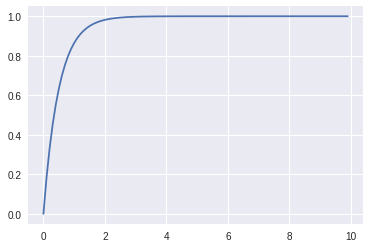

In [ ]:
# Grafica CDF
plt.plot(x, cdf_x) 

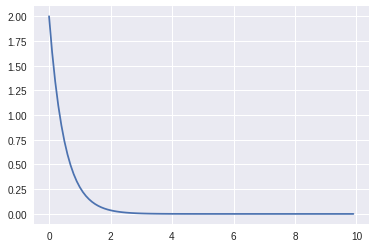

In [ ]:
# Grafica PDF
plt.plot(x, pdf_x) 

Es importante tener en cuenta que con un número reducido de muestras, es difícil ver que la distribución empírica exacta se ajuste a una distribución continua. La mejor manera de observar esta coincidencia es generar muestras de la distribución continua y ver si estas muestras coinciden con los datos. 

#### Distribución normal

**La gráfica de la función de densidad de la distribución normal, distribución de Gauss, distribución gaussiana o distribución de Laplace-Gauss, tiene una forma acampanada y es simétrica.** Esta curva se conoce como campana de Gauss.

La importancia de la distribución normal recae en que permite modelar numerosos fenómenos naturales y sociales. ​Los mecanismos que subyacen a gran parte de este tipo de fenómenos son desconocidos por la enorme cantidad de variables incontrolables que en ellos intervienen. El uso de la distribución normal asume que cada observación se obtiene como la suma de unas pocas causas independientes.

La distribución normal también es importante por su relación con la estimación por mínimos cuadrados, uno de los métodos de estimación más simples y antiguos.

Para encontrar la CDF de la distribución normal, necesitamos integrar la función PDF. Esta integral no tiene solución de forma cerrada, por lo que su representación más común es la PDF, que se define como:

$PDF(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

donde el parámetro $\sigma$ define la forma de la distribución.

In [ ]:
# Declara arreglo
x = np.arange(0, 10, 0.1)

In [ ]:
# Calcula PDF 
mu = x.mean()
std = x.std()
pdf_x = 1/np.sqrt(2*np.pi*std**2) * np.exp(-0.5*((x-mu)/std)**2)

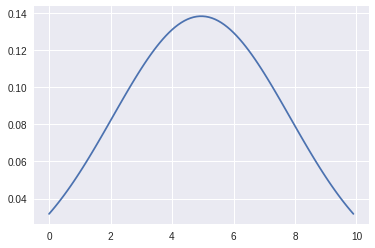

In [ ]:
# Grafica PDF
plt.plot(x, pdf_x) 

### Densidad kernel

En muchos problemas reales, es posible que no estemos interesados en los parámetros de una distribución particular de datos, sino solo en una **representación continua de los datos**. En este caso, debemos **estimar la distribución de forma no paramétrica** (es decir, sin hacer suposiciones sobre la forma de la distribución subyacente) **utilizando la estimación de densidad kernel**. 

Si tenemos un conjunto de medidas de datos sin conocer su distribución y necesitamos estimar la representación continua de su distribución, podemos considerar un kernel gaussiano para generar la densidad alrededor de los datos. 

Considerando un conjunto de datos aleatorios generados por una distribución normal bimodal y un núcleo gaussiano alrededor de los datos. La suma de los núcleos puede darnos una función continua que, cuando se normaliza, se aproximaría a la densidad de la distribución.

In [ ]:
# Declara arreglos con valores aleatorios normalmente distribuidos
x1 = np.random.normal(-1, 0.5, 15)
x2 = np.random.normal(6, 1, 10)

In [ ]:
# Concatena x1 y x2
y = np.r_[x1 , x2]

In [ ]:
# Estimación de la densidad kernel
krnl_density = 

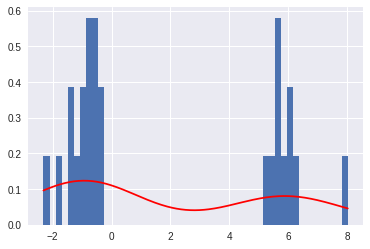

In [ ]:
# Grafica densidad kernel
xgrid = np.linspace(y.min(), y.max(), 200)
plt.hist(y, bins=50, density = True)
plt.plot(xgrid, krnl_density(xgrid), "r-")

### Ejercicios

1. Responde las siguientes preguntas analizando el conjunto de datos [adult](https://archive.ics.uci.edu/ml/datasets/Adult). Justifica tu respuesta con datos. 

  1.1. ¿Qué diferencias en ingresos se observan entre hombres y mujeres?

  1.2. ¿Qué diferencias en ingresos se observan entre los distintos grados educativos? 

2. Utilizando el conjunto de datos [birthdays](https://github.com/sarahiaguilar/fundamentos-cdd/blob/main/datos/birthdays.csv):

  2.1. Calcula y grafica la función de distribución acumulada de los días entre cada cumpleaños. 

  2.2. Calcula y grafica la función de densidad de probabilidad de los días entre cada cumpleaños. 